Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[8.31888 154.585; 7.46066 154.776; … ; 7.9829 154.794; 7.94263 155.576]

Union{Missing, Float64}[7.62336 154.069; 7.8182 155.128; … ; 7.43363 154.443; 7.43363 154.443]

Union{Missing, Float64}[7.61067 154.032; 7.53006 153.853; … ; 8.35012 154.271; 8.05681 154.113]

Union{Missing, Float64}[8.2664 154.629; 7.76538 154.742; … ; 7.61584 154.967; 7.77875 154.474]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD      Naive SE       MCSE     ESS
sigma   7.771953 0.2914769 0.0046086545 0.005794102 1000
   mu 154.600664 0.4173240 0.0065984718 0.007741144 1000

Quantiles:
         2.5%      25.0%     50.0%      75.0%       97.5%  
sigma   7.203945   7.57811   7.76961   7.9610825   8.364763
   mu 153.772000 154.33500 154.59600 154.8780000 155.434000



Plot the density of posterior draws

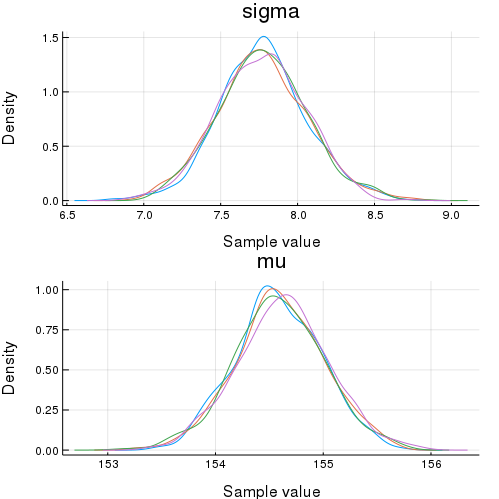

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.15857800059959942
 0.08271672889693533

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
 1.0        0.0249877
 0.0249877  1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*